In [29]:
import pandas as pd

In [30]:
data = pd.read_csv('heart.csv')

In [31]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
data_dup = data.duplicated().any()

In [33]:
data_dup

True

In [34]:
data = data.drop_duplicates()

In [35]:
data_dup = data.duplicated().any()
data_dup

False

In [36]:
#seprating categorical values and numerical values for data preprocessing for handeling them seprately
cat_val=[]
num_val=[]
for columns in data.columns :
    if data[columns].nunique() <= 10:
        cat_val.append(columns)
    else:
        num_val.append(columns)

In [37]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [38]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [39]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [40]:
cat_val.remove('sex')
cat_val.remove('target')
data=pd.get_dummies(data,columns=cat_val,drop_first=True)

In [41]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [42]:
# fetature scaling

In [43]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
st= StandardScaler()
data[num_val] = st.fit_transform(data[num_val])

In [46]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [47]:
#spliting data for training

In [48]:
X = data.drop('target',axis=1)

In [49]:
y = data['target']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [55]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
297,0.396267,1,1.049221,0.454829,-1.686795,-0.209608,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
194,1.392616,1,1.619532,0.764500,-1.817996,0.394086,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
154,0.949794,1,-0.091401,1.616096,-0.768384,0.652812,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
255,0.839089,0,0.478910,2.854780,0.324963,0.135360,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1.503322,1,-0.775774,0.590310,0.062560,-0.037124,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
147,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
260,-1.153610,1,-0.661712,-0.396766,0.849769,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [56]:
#logistic regression

In [57]:
data.head() # target is used for classsification that the disease is present or not so we will use classification algos for this model

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_pred1 = lr.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [63]:
#SVC

In [70]:
from sklearn import svm

In [71]:
svc = svm.SVC()

In [73]:
svc.fit(x_train,y_train)

SVC()

In [74]:
y_pred2 = svc.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred2)

0.7540983606557377

In [77]:
# Kneighbours Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
KN=KNeighborsClassifier(n_neighbors=3)

In [87]:
KN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [88]:
y_pred3 = KN.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
accuracy_score(y_test,y_pred3)*100

83.60655737704919

In [90]:
score =[]
for k in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=k)
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred)*100)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [85]:
score

[73.77049180327869,
 77.04918032786885,
 83.60655737704919,
 81.9672131147541,
 81.9672131147541,
 81.9672131147541,
 85.24590163934425,
 81.9672131147541,
 81.9672131147541,
 81.9672131147541,
 83.60655737704919,
 80.32786885245902,
 78.68852459016394,
 77.04918032786885,
 80.32786885245902,
 78.68852459016394,
 80.32786885245902,
 78.68852459016394,
 80.32786885245902,
 80.32786885245902,
 80.32786885245902,
 81.9672131147541,
 80.32786885245902,
 80.32786885245902,
 80.32786885245902,
 81.9672131147541,
 80.32786885245902,
 81.9672131147541,
 81.9672131147541,
 80.32786885245902,
 78.68852459016394,
 78.68852459016394,
 78.68852459016394,
 78.68852459016394,
 78.68852459016394,
 78.68852459016394,
 78.68852459016394,
 78.68852459016394,
 78.68852459016394]

In [91]:
# NON-LINEAR ML ALGOS 
# Now we are going to use non linear algos for our model so we donot required any preprocessing for our model i.e encoding and featurescalling

In [92]:
data = pd .read_csv('heart.csv')

In [93]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [94]:
data = data.drop_duplicates()

In [96]:
data.shape

(302, 14)

In [97]:
x = data.drop('target',axis=1)
y = data['target']

In [98]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [99]:
# Dessision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtc = DecisionTreeClassifier()

In [102]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred4 = dtc.predict(x_test)

In [105]:
accuracy_score(y_test,y_pred4)*100

67.21311475409836

In [106]:
# Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rfc= RandomForestClassifier()

In [109]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
y_pred5= rfc.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred5)*100

81.9672131147541

In [112]:
# Gradient Boosting Classifier

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
gbc= GradientBoostingClassifier()

In [115]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [117]:
y_pred6=gbc.predict(x_test)

In [118]:
accuracy_score(y_test,y_pred6)*100

85.24590163934425

In [120]:
accuracy_score(y_test,y_pred1)
final_data = pd.DataFrame({'Models': ['lr','svc','KN','dtc','rfc','gbc'],'ACC' : [accuracy_score(y_test,y_pred1),
                                                                                 accuracy_score(y_test,y_pred2),
                                                                                 accuracy_score(y_test,y_pred3),
                                                                                 accuracy_score(y_test,y_pred4),
                                                                                 accuracy_score(y_test,y_pred5),
                                                                                 accuracy_score(y_test,y_pred6)]})

In [121]:
final_data

,Models,ACC
0,lr,0.786885
1,svc,0.754098
2,KN,0.836066
3,dtc,0.672131
4,rfc,0.819672
5,gbc,0.852459


In [122]:
import seaborn as sb

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

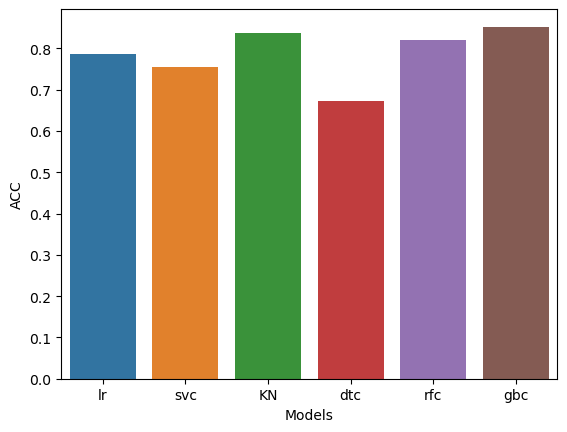

In [123]:
sb.barplot(final_data['Models'],final_data['ACC'])

In [124]:
#Final Model Formation Using Gradiant Boosting Classifier Since Its Accuracy Score Is 85%

In [125]:
x = data.drop('target',axis=1)
y = data['target']

In [127]:
x.shape

(302, 13)

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
gbc= GradientBoostingClassifier()
gbc.fit(x,y)

GradientBoostingClassifier()

In [130]:
# Testing Model On Any Data Value

In [131]:
import pandas as pd

In [132]:
new = pd.DataFrame({
    'age' : 52,
    'sex' : 1,
    'cp' : 0,
    'trestbps' : 125,
    'chol' : 212,
    'fbs' : 0,
    'restecg' : 1,
    'thalach' : 168,
    'exang' : 0,
    'oldpeak' : 1.0,
    'slope' : 2,
    'ca' : 2,
    'thal' : 3,
},index=[0])

In [133]:
new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [136]:
p = gbc.predict(new)
if p[0] == 0:
    print("No Heart-Disease")
else:
    print("Heart Disease Is Detected")

No Heart-Disease


In [137]:
# Now Saving Our Final Model 

In [138]:
import pickle as pc

In [139]:
pc.dump(gbc,open('model_pickle_heart.pkl','wb'))

In [142]:
model = pc.load(open('model_pickle_heart.pkl','rb'))

In [143]:
p=model.predict(new)
if p[0] == 0:
    print("No Heart-Disease")
else:
    print("Heart Disease Is Detected")

No Heart-Disease
